# Bifurcation analysis

There are several types of bifurcations we'll consider, but in general a bifurcation is when there is a sudden large change in your system behavior when a parameter is slightly modified. The value of a parameter can change due to uncertainty involved in estimating the value of the parameters or when the parameter represents a physical process that can be manipulated (flow rates).

A common example in chemical engineering is runaway reactions. This is when there is a sudden acceleration of the production of chemical product that can occur during exothermic reactions. Sudden increases in product means sudden increases in heat, which all means something really bad. 

<img src="https://shoemakerlab.pitt.edu/math_images//Bayer Explosion.jpg" width = "500">

In 2008, a large explosion and fire that took the lives of two workers at the Bayer CropScience plant was caused by a thermal runaway reaction. Nonlinear modeling has been a critical tool to understanding and regulating runaway reactions, leading to improved safety at chemical plants. 

So let's see how visual approaches to understanding nonlinear ODEs can help us understand basic bifurcation events.

**Reminder**: We are still avoiding solving our ODEs right now. We will come to that when we discuss simple linear systems in a few lectures.

## Saddle Node Bifurcations

This is when a steadystate is created or destroyed as a model parameter is varied. To see how this happens, consider the system
\begin{align}
\dot{x} = r + x^2\\
\end{align}

And let's perform a flow on a line analysis for when r is less than zero, equal to zero or greater than zero. You can solve this by hand pretty quick and see (img from Strogatz, pg 45):

<img src = "https://shoemakerlab.pitt.edu/math_images/saddle node.jpg">

When r < 0, two steadystates exists, one stable and one unstable. So long as our initial condition is less than the value of the unstable SS, we will flow forward in time to the stable steady state. But if our initial condition is greater than the unstable SS, our solution will explode to $\infty$.

As r is increased we hit a critical point at r = 0 when the steady state becomes half-stable.If solved analytically and we start with an initial x < 0, the solution should flow to a SS value of 0. However, this SS is very delicate! In reality, such a SS cannot exist (all things in life have noise). Also, as we begin to discuss simulations, we should remember that all simulators have ERROR. Most simulators cannnot simulation scenarios that involve a half-stable SS.

And then as r > 0, no steady states exist and the system becomes full unstable. It doesn't matter where are initial starting point is - the solution will always explode to $\infty$.

To illustrate how the SS changes during a bifurcation analysis, we typically plot a **bifurcation diagram**. Here we see the two steady states exists when r < 0, and broken lines indicate unstable steadystates while solid lines indicate stable steady state. 

<img src="https://shoemakerlab.pitt.edu/math_images//saddle node bifurcation diagram.jpg" width="500">


## Transcritical Bifurcation

In some situations (probably most), a steady state should exist for all values of a given parameter. An example is growth of a species or virus. Regardless of how quickly the species reproduces and dies, there should always be some steady state at zero, but that steadstate may switch between stable and unstable. Here, we'll show 2 types of a transcritical bifurcation, which is when the steady state points do not disappear (as they did above) but instead their stability changes.

Here is a general population equation
\begin{align}
\dot{N} = rN(1-\frac{N}{K}) = rN-\frac{r}{K}N^2\\
\end{align}

This equation was developed in 1838 to define the growth of human populations :-) But can be applied to the growth of most any species and is normally referred to as the *logistic equation.* In the equation, $rN$ defines the rate of population growth, where the population grows exponentially in the absence of death and resource depletion. Population decline is defined by $(r/K)N^2$ where $K$ is the population carrying capacity. The meaning of this constant is quite clear if you quickly calculate the steady state values for nonzero r and K.

\begin{align}
rN(1-\frac{N}{K}) = 0\\
\end{align}

One solution is $N_{ss1} = 0$. Otherwise, we solve for when N is not zero, $1-\frac{N}{K}=0$, which leads to $N_{ss2}=K$.

Now let's apply flow on a line to understand the stability of these fixed points. And for simplicity, let K = 1.I put the code to run this for different r and K values.

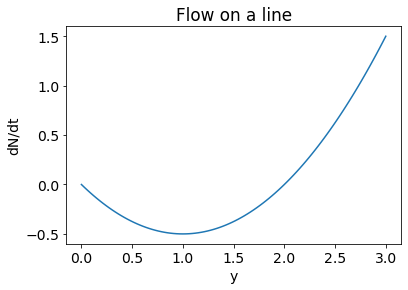

In [ ]:
# Import the required modules
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

def dNdt(N,r,K):
    dNdt = r*N*(1-N/K)
    return dNdt


y_values = np.linspace(0,3,100)

dydt_values = []
for m in y_values:
    dydt_values.append(dNdt(m,-1,2))
    
# Plot derivative vs y
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("y")
plt.ylabel("dN/dt")
plt.title("Flow on a line")
plt.plot(y_values,dydt_values);


Running the above code for multiple r values should convince you that only 2 steadystates exist for all r and these are $N_{ss} = [0,K]$. For r > 0, $N_{ss} = K$ is stable while $N_{ss} = 0$ is unstable.  For r < 0, $N_{ss} = K$ is unstable while $N_{ss} = 0$ is stable. So the number, and in this case, the value of the steady states never change, just their stability. 

Here is the bifurcation diagram

<img src ="https://shoemakerlab.pitt.edu/math_images//transcritical bifurcation 1.jpg" width = "500">

A slightly different example of a transcritical bifurcation occurs with $\dot{x} = rx-x^2$. If you perform another Flow analysis to determine the steady states and then the stability of those steady states, you'll end up with the bifurcation diagram shown below. This is still classified as a transcritical bifurcation. It is interpreted as two steadystates that never disappear (as in the case of a saddle node bifurcation), but they change value and stability as r changes. 

<img src ="https://shoemakerlab.pitt.edu/math_images//transcritical bifurcation 2.jpg" width = "500">

## Last example bifurcation : hysterisis (aka jumps)

My goal is not to cover all possible bifurcations nor is it to make you an expert in bifurcation analysis. My primary goal is to introduce you to bifurcation analysis and I hope it becomes clear that this type of analysis is very simple and provides a lot of insight into the dynamic responses of ODEs. A lot of what we are discussing will be reinforced in your homework. And for now we'll cover one more bifurcation behavior called hysterisis. 

Consider $\dot{x} = rx+x^3-x^5$. This equation arises in the study of energy potentials. Your homework will have you analyze this equation using flow to better understand how the bifurcation plot is generated. Here, the bifurcation plot is provided. As we can see, when r is less than some critical value, there is only 1 steady state at zero and it's stable. As r increases, some craziness happens.

<img src="images/hysterisis.jpg" width="500">

Up to 4 steadystates become possible. For two of the steadystate manifolds, the steadystate is unstable. And three other manifolds exist. The furthest above and below zero are stable manifolds while the steadystate at zero become unstable.

Putting all these pieces together means that some very interesting dynamics occur and, ultimately, switching between steadystates means having to overshoot.

**I'll explain more here in words using powerpoint**

# Interesting point on hyterisis is the system has a type of "memory"

If we start in the zone which has 3 steady states and want to use the parameter r to get to a steadystate of x = 0, we cannot just arbitrarily drop r to the zone with 3 steady state and hope it goes to the zero steadystate. Our solution will not be able to cross the unstable "manifold". Instead, r must be reduced all the way past the zone of 3 steady states to return to zero! 

# Flow analysis of hysterisis equation

[-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ]


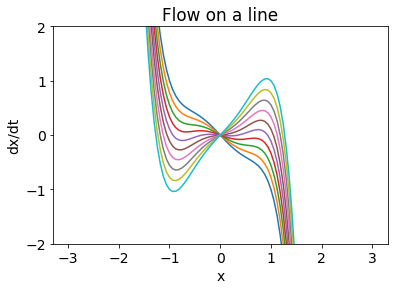

In [ ]:
# Import the required modules
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

def dxdt(x,r):
    dxdt = r*x+x**3-x**5
    return dxdt

# list r values to test
r = np.linspace(-1,1,10) # Be sure to try -.1 to .1
print(r)

x_values = np.linspace(-3,3,100)


for n in r:
    dxdt_values = []
    for m in x_values:
        dxdt_values.append(dxdt(m,n))
    # Plot derivative vs y
    plt.rcParams.update({'font.size': 14})  # increase the font size
    plt.xlabel("x")
    plt.ylabel("dx/dt")
    plt.title("Flow on a line")
    plt.ylim(-2, 2) # zoom in as necessary
    plt.plot(x_values,dxdt_values)

## Wrap up on flow and bifurcation analysis of first order ODEs

Flow on a line is great for understanding how a first order ODE evolves to steady state. A bifurcation diagram informs us as to how the steadystates of the system change when changing a parameter. Worded another way, a bifurcation diagram summarizes the results of an iterative flow analysis performed for multiple parameter values. And both techniques can be applied to arbitrarily complex, first order ODEs.

But while these approaches are great for simple first order systems, as we'll soon see, the application of visual approaches like these are limited to our ability to...well...visualize. So next we'll transition to 2 second order systems.